In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.metrics import classification_report, cohen_kappa_score, confusion_matrix
from sklearn.preprocessing import minmax_scale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X = pd.read_csv('/home/swagmaster/Downloads/F21DL/CW1/original/x_train_gr_smpl.csv')
y = pd.read_csv('/home/swagmaster/Downloads/F21DL/CW1/original/y_train_smpl.csv')

y_0 = pd.read_csv('/home/swagmaster/Downloads/F21DL/CW1/original/y_train_smpl_0.csv')
y_1 = pd.read_csv('/home/swagmaster/Downloads/F21DL/CW1/original/y_train_smpl_1.csv')
y_2 = pd.read_csv('/home/swagmaster/Downloads/F21DL/CW1/original/y_train_smpl_2.csv')
y_3 = pd.read_csv('/home/swagmaster/Downloads/F21DL/CW1/original/y_train_smpl_3.csv')
y_4 = pd.read_csv('/home/swagmaster/Downloads/F21DL/CW1/original/y_train_smpl_4.csv')
y_5 = pd.read_csv('/home/swagmaster/Downloads/F21DL/CW1/original/y_train_smpl_5.csv')
y_6 = pd.read_csv('/home/swagmaster/Downloads/F21DL/CW1/original/y_train_smpl_6.csv')
y_7 = pd.read_csv('/home/swagmaster/Downloads/F21DL/CW1/original/y_train_smpl_7.csv')
y_8 = pd.read_csv('/home/swagmaster/Downloads/F21DL/CW1/original/y_train_smpl_8.csv')
y_9 = pd.read_csv('/home/swagmaster/Downloads/F21DL/CW1/original/y_train_smpl_9.csv')

y.columns = ['y']
y_0.columns = ['y']
y_1.columns = ['y']
y_2.columns = ['y']
y_3.columns = ['y']
y_4.columns = ['y']
y_5.columns = ['y']
y_6.columns = ['y']
y_7.columns = ['y']
y_8.columns = ['y']
y_9.columns = ['y']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [4]:
X_0_train, X_0_test, y_0_train, y_0_test = train_test_split(X, y_0, test_size=0.33, random_state=42, stratify = y_0)

In [5]:
def topNpixels(n, y_corr):
    
    pix = y_corr[0].iloc[0:n].index
    for corr in y_corr[1:]:
        pix = pix.append(corr.iloc[0:n].index)
        
    return pix.unique()

In [6]:
def nbwhole(X_train, X_test, b, y_train, y_test):
    
    clf_gnb = GaussianNB()
    clf_mnb = MultinomialNB()
    clf_cat = CategoricalNB()
    
    clf_gnb.fit(X_train, y_train)
    clf_mnb.fit(X_train, y_train)
    clf_cat.fit(X_train, y_train)
    
    pred_gnb = clf_gnb.predict(X_test)
    pred_mnb = clf_mnb.predict(X_test)
    pred_cat = clf_cat.predict(X_test)
    
    rep_gnb = pd.DataFrame(classification_report(y_test, pred_gnb, output_dict = True)).T
    rep_mnb = pd.DataFrame(classification_report(y_test, pred_mnb, output_dict = True)).T
    rep_cat = pd.DataFrame(classification_report(y_test, pred_cat, output_dict = True)).T
    
    kappa_gnb = cohen_kappa_score(y_test, pred_gnb)
    kappa_mnb = cohen_kappa_score(y_test, pred_mnb)
    kappa_cat = cohen_kappa_score(y_test, pred_cat)
    
    conf_gnb = pd.DataFrame(confusion_matrix(y_test, pred_gnb))
    conf_mnb = pd.DataFrame(confusion_matrix(y_test, pred_mnb))
    conf_cat = pd.DataFrame(confusion_matrix(y_test, pred_cat))
    
    rep = [rep_gnb, rep_mnb, rep_cat]
    kappa = [kappa_gnb, kappa_mnb, kappa_cat]
    conf = [conf_gnb, conf_mnb, conf_cat]
    
    return rep, kappa, conf

In [7]:
def nb(n = 0, b = 11, X = X, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test):
    if n == 0:
        return nbwhole(X_train, X_test, b, y_train, y_test)
    else:
        y_corr = corr(X)
        pix = topNpixels(n, y_corr)
        X_train_pix, X_test_pix = X_train[pix.unique()], X_test[pix.unique()]
        return y_corr, pix.unique(), nbwhole(X_train_pix, X_test_pix, b, y_train, y_test)

In [8]:
def corr(X):
    
    y_0_corr_abs_ordered = X.corrwith(y_0.y).abs().sort_values(ascending = False)
    y_1_corr_abs_ordered = X.corrwith(y_1.y).abs().sort_values(ascending = False)
    y_2_corr_abs_ordered = X.corrwith(y_2.y).abs().sort_values(ascending = False)
    y_3_corr_abs_ordered = X.corrwith(y_3.y).abs().sort_values(ascending = False)
    y_4_corr_abs_ordered = X.corrwith(y_4.y).abs().sort_values(ascending = False)
    y_5_corr_abs_ordered = X.corrwith(y_5.y).abs().sort_values(ascending = False)
    y_6_corr_abs_ordered = X.corrwith(y_6.y).abs().sort_values(ascending = False)
    y_7_corr_abs_ordered = X.corrwith(y_7.y).abs().sort_values(ascending = False)
    y_8_corr_abs_ordered = X.corrwith(y_8.y).abs().sort_values(ascending = False)
    y_9_corr_abs_ordered = X.corrwith(y_9.y).abs().sort_values(ascending = False)
    
    return [y_0_corr_abs_ordered, y_1_corr_abs_ordered, y_2_corr_abs_ordered, y_3_corr_abs_ordered, 
            y_4_corr_abs_ordered, y_5_corr_abs_ordered, y_6_corr_abs_ordered, y_7_corr_abs_ordered, 
            y_8_corr_abs_ordered, y_9_corr_abs_ordered]

In [9]:
# basic reporting
basic = nb()

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [10]:
for x in range(0,3):
    basic[0][x].to_csv(str(x)+'.csv')

In [11]:
_, _, t5 = nb(n = 5)
_, _, t10 = nb(n = 10)
_, _, t20 = nb(n = 20)

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array w

In [12]:
for x in range(0,3):
    t5[0][x].to_csv(str(x)+'.csv')

In [13]:
for x in range(0,3):
    t10[0][x].to_csv(str(x)+'.csv')

In [14]:
for x in range(0,3):
    t20[0][x].to_csv(str(x)+'.csv')

In [15]:
X_minmax = pd.DataFrame(minmax_scale(X, axis = 1))
X_train_minmax = pd.DataFrame(minmax_scale(X_train, axis = 1))
X_test_minmax = pd.DataFrame(minmax_scale(X_test, axis = 1))

In [16]:
_, _, minmax_rows_5 = nb(n = 5, X = X_minmax, b = 0.5, X_train = X_train_minmax, X_test = X_test_minmax)
_, _, minmax_rows_10 = nb(n = 10, X = X_minmax, b = 0.5, X_train = X_train_minmax, X_test = X_test_minmax)
_, _, minmax_rows_20 = nb(n = 20, X = X_minmax, b = 0.5, X_train = X_train_minmax, X_test = X_test_minmax)

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-define

In [17]:
for x in range(0,3):
    minmax_rows_5[0][x].to_csv(str(x)+'.csv')

In [18]:
for x in range(0,3):
    minmax_rows_10[0][x].to_csv(str(x)+'.csv')

In [19]:
for x in range(0,3):
    minmax_rows_20[0][x].to_csv(str(x)+'.csv')

In [20]:
X_minmax_1dp = pd.DataFrame(minmax_scale(X, axis = 1)).round(1)
X_train_minmax_1dp = pd.DataFrame(minmax_scale(X_train, axis = 1)).round(1)
X_test_minmax_1dp = pd.DataFrame(minmax_scale(X_test, axis = 1)).round(1)

In [21]:
_, _, minmax_1dp_5 = nb(n = 5, b = 0.45,  X = X_minmax_1dp, X_train = X_train_minmax_1dp, X_test = X_test_minmax_1dp)
_, _, minmax_1dp_10 = nb(n = 10, b = 0.45, X = X_minmax_1dp, X_train = X_train_minmax_1dp, X_test = X_test_minmax_1dp)
_, _, minmax_1dp_20 = nb(n = 20, b = 0.45, X = X_minmax_1dp, X_train = X_train_minmax_1dp, X_test = X_test_minmax_1dp)

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array w

In [22]:
for x in range(0,3):
    minmax_1dp_5[0][x].to_csv(str(x)+'.csv')

In [23]:
for x in range(0,3):
    minmax_1dp_10[0][x].to_csv(str(x)+'.csv')

In [24]:
for x in range(0,3):
    minmax_1dp_20[0][x].to_csv(str(x)+'.csv')

# The below functions were taken from Kavyan's clustering tutorial which was adapted from Aurelien Geron's Hand's on with Machine Learning

In [25]:
def plot_data(X):
#     plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plt.plot(X.iloc[:, 0], X.iloc[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [26]:
pca_2d = PCA(n_components=2)

In [27]:
PCs_2d = pd.DataFrame(pca_2d.fit_transform(X_minmax))

In [29]:
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


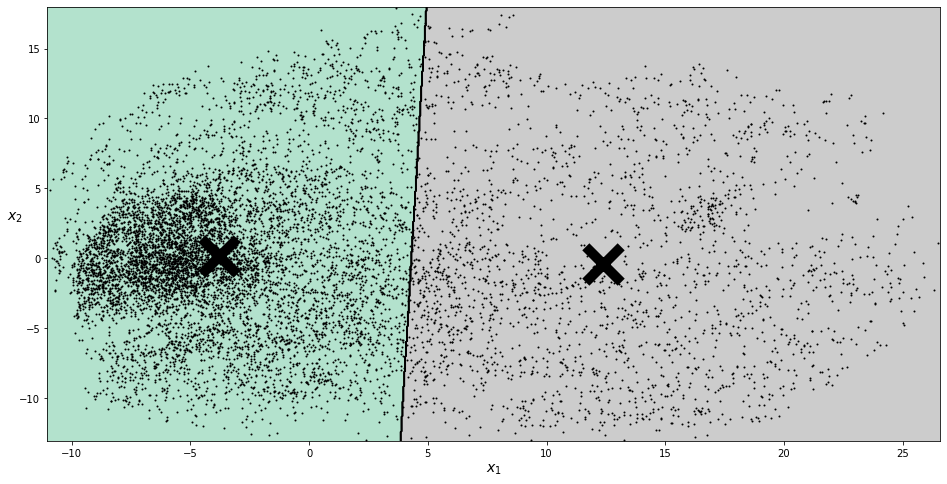

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


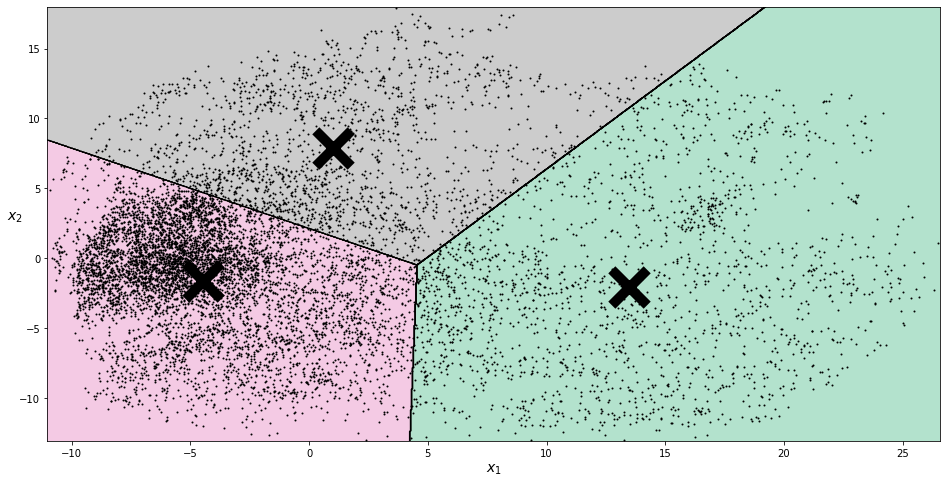

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


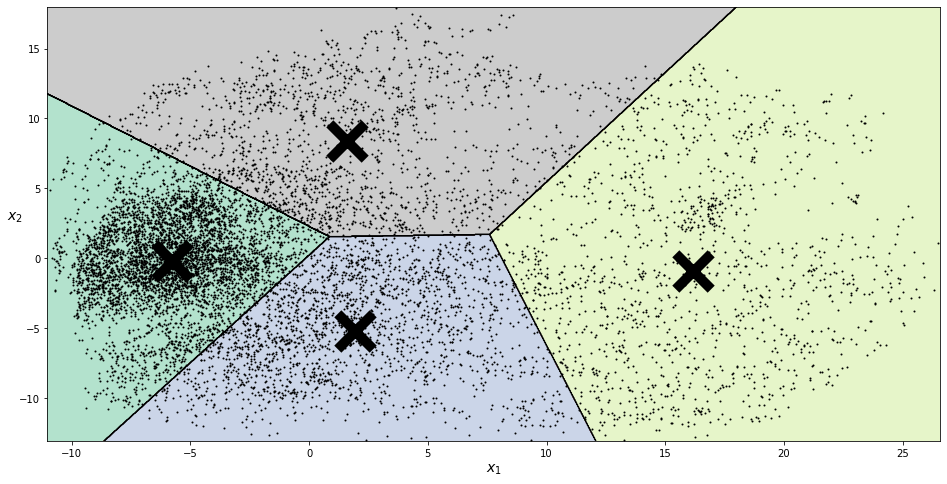

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


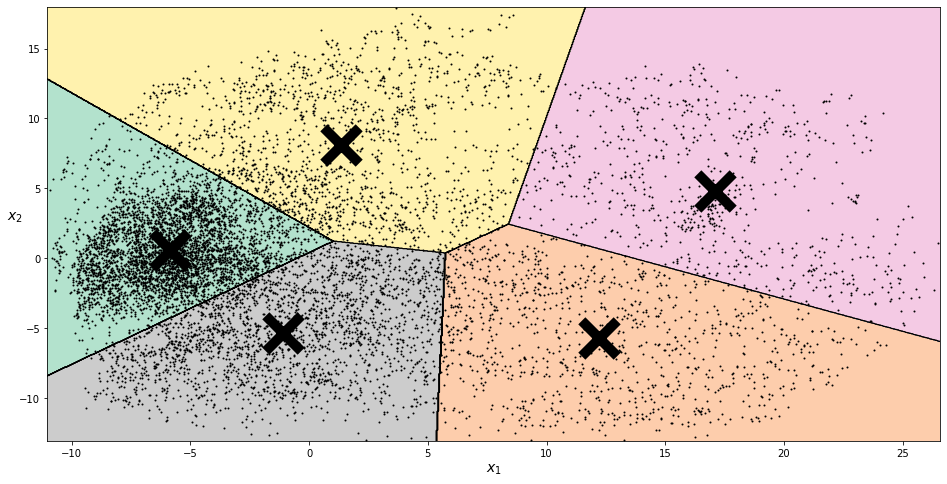

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


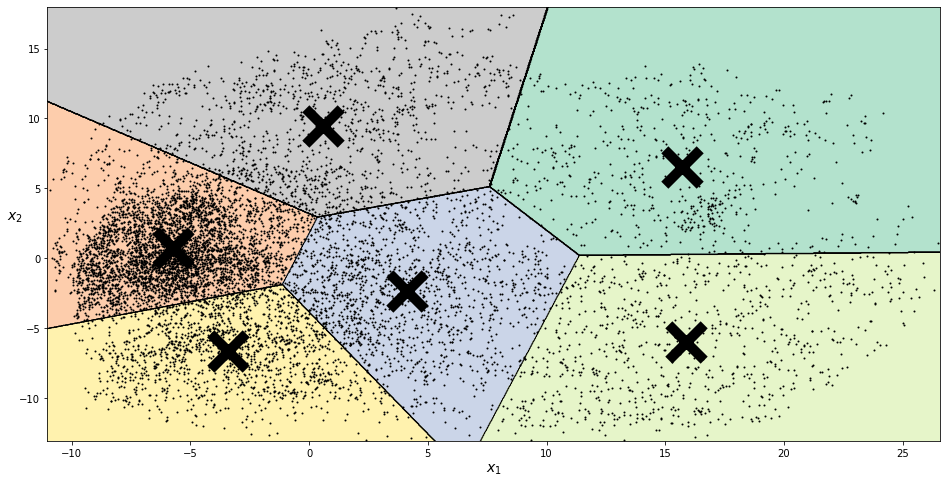

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


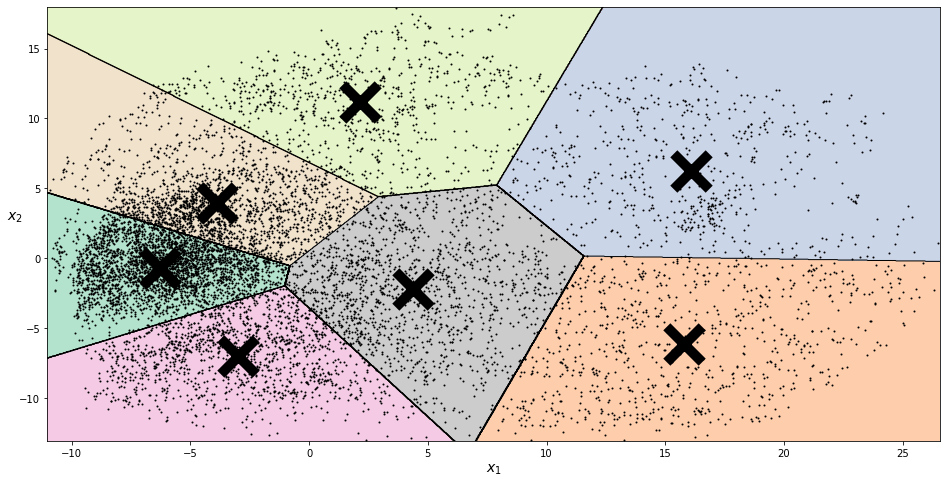

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


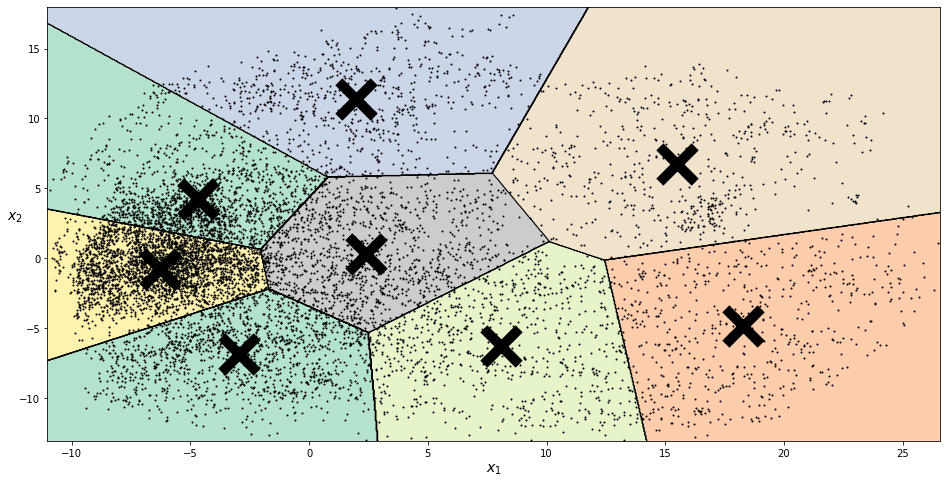

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


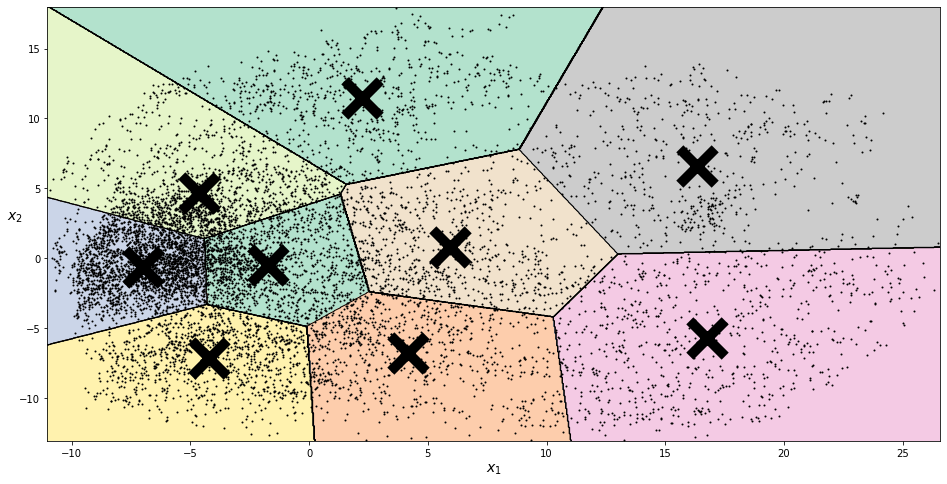

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


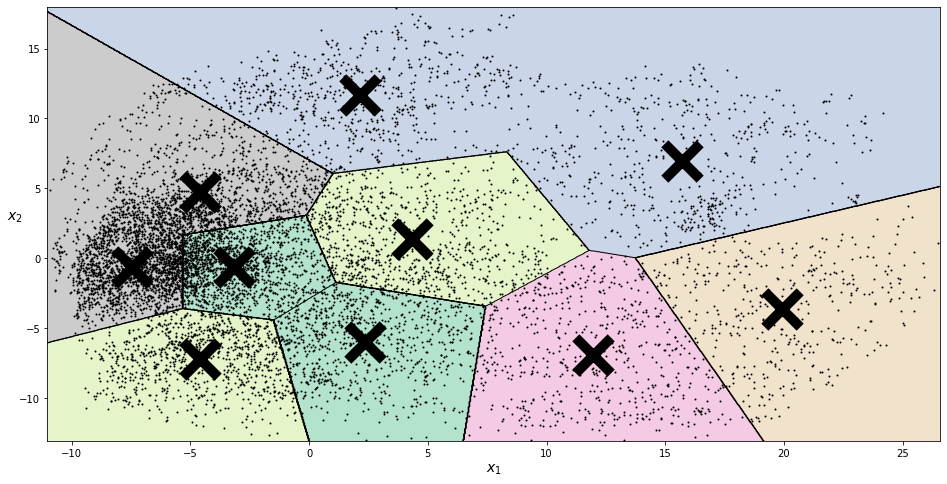

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarnin

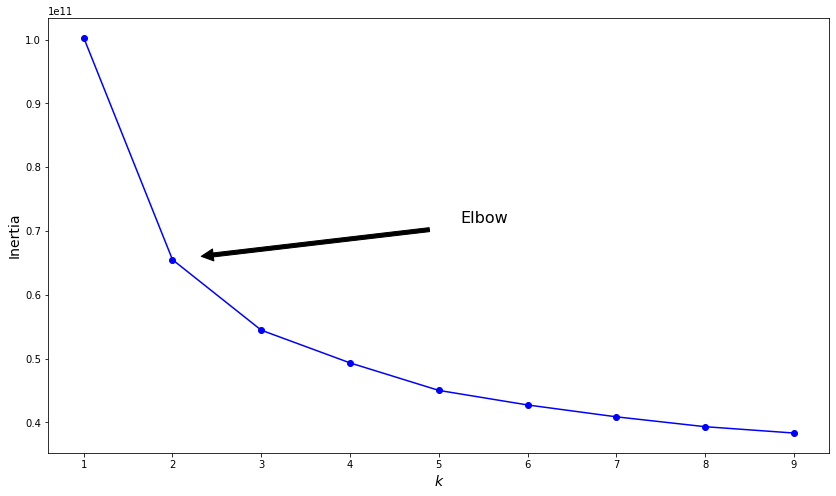

In [52]:
kmeans = KMeans(n_clusters=2, random_state=0, n_jobs = -1)
y_pred = kmeans.fit_predict(PCs_2d)

plt.figure(figsize=(16, 8))
plot_decision_boundaries(kmeans, PCs_2d)
plt.show()

kmeans = KMeans(n_clusters=3, random_state=0, n_jobs = -1)
y_pred = kmeans.fit_predict(PCs_2d)

plt.figure(figsize=(16, 8))
plot_decision_boundaries(kmeans, PCs_2d)
plt.show()

kmeans = KMeans(n_clusters=4, random_state=0, n_jobs = -1)
y_pred = kmeans.fit_predict(PCs_2d)

plt.figure(figsize=(16, 8))
plot_decision_boundaries(kmeans, PCs_2d)
plt.show()

kmeans = KMeans(n_clusters=5, random_state=0, n_jobs = -1)
y_pred = kmeans.fit_predict(PCs_2d)

plt.figure(figsize=(16, 8))
plot_decision_boundaries(kmeans, PCs_2d)
plt.show()

kmeans = KMeans(n_clusters=6, random_state=0, n_jobs = -1)
y_pred = kmeans.fit_predict(PCs_2d)

plt.figure(figsize=(16, 8))
plot_decision_boundaries(kmeans, PCs_2d)
plt.show()

kmeans = KMeans(n_clusters=7, random_state=0, n_jobs = -1)
y_pred = kmeans.fit_predict(PCs_2d)

plt.figure(figsize=(16, 8))
plot_decision_boundaries(kmeans, PCs_2d)
plt.show()

kmeans = KMeans(n_clusters=8, random_state=0, n_jobs = -1)
y_pred = kmeans.fit_predict(PCs_2d)

plt.figure(figsize=(16, 8))
plot_decision_boundaries(kmeans, PCs_2d)
plt.show()

kmeans = KMeans(n_clusters=9, random_state=0, n_jobs = -1)
y_pred = kmeans.fit_predict(PCs_2d)

plt.figure(figsize=(16, 8))
plot_decision_boundaries(kmeans, PCs_2d)
plt.show()

kmeans = KMeans(n_clusters=10, random_state=0, n_jobs = -1)
y_pred = kmeans.fit_predict(PCs_2d)

plt.figure(figsize=(16, 8))
plot_decision_boundaries(kmeans, PCs_2d)
plt.show()

kmeans_per_k = [KMeans(n_clusters=k, random_state=0, n_jobs = -1).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(14, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


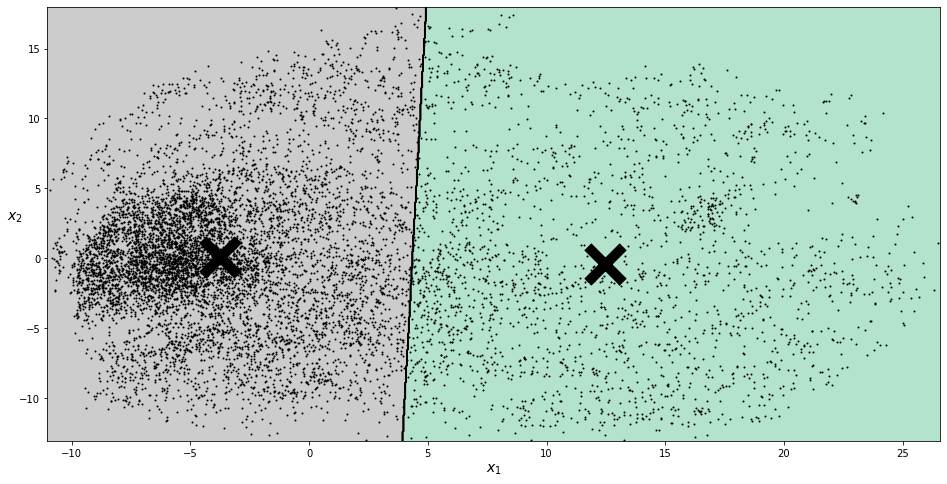

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


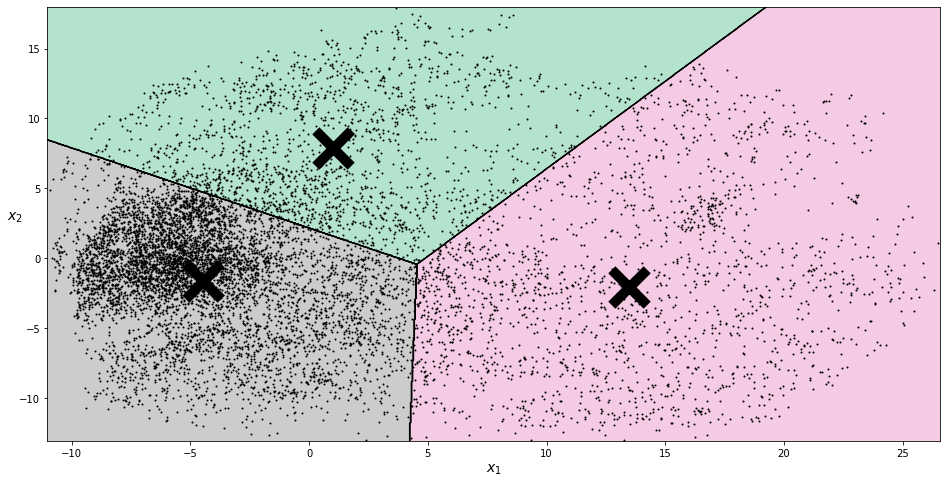

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


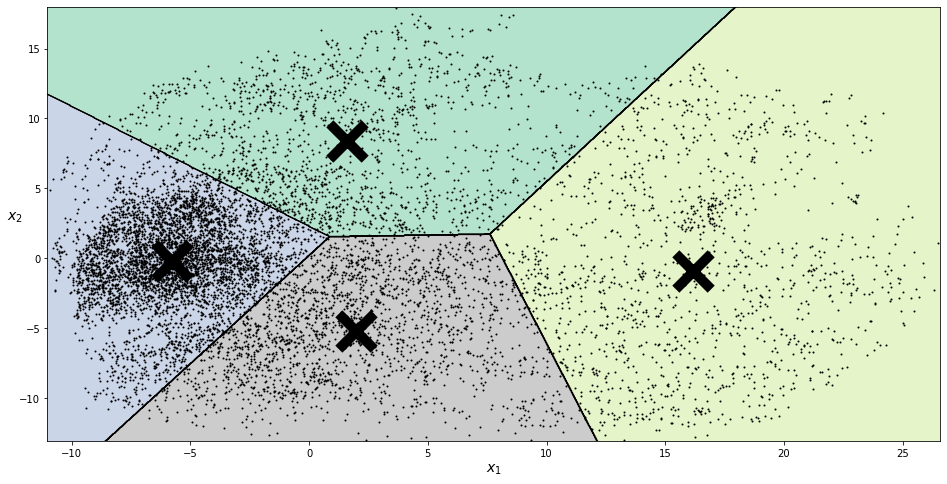

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


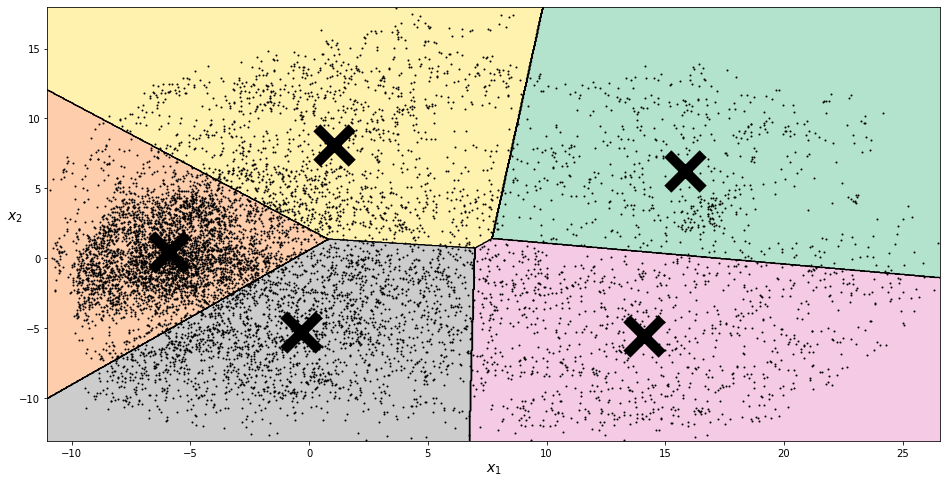

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


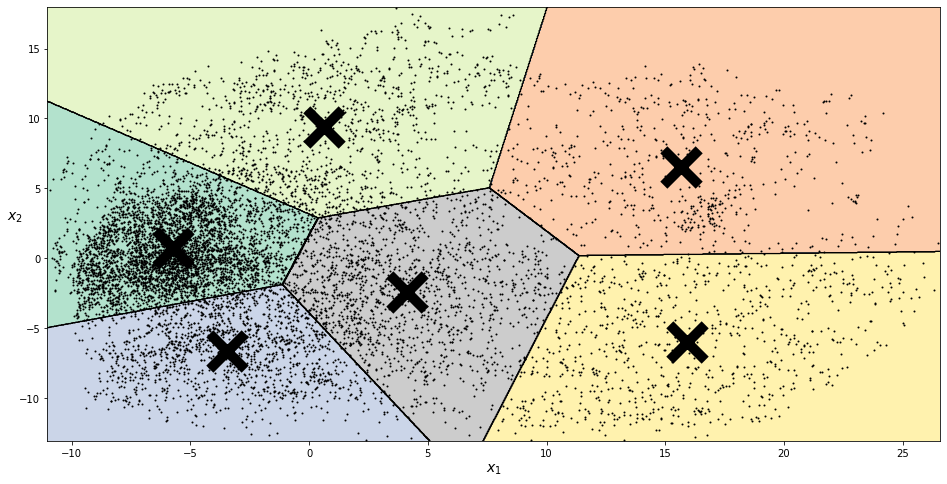

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


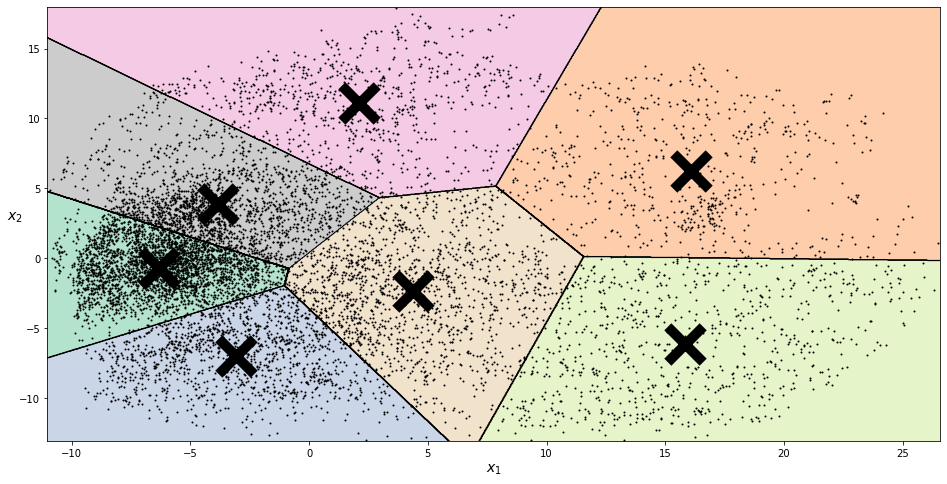

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


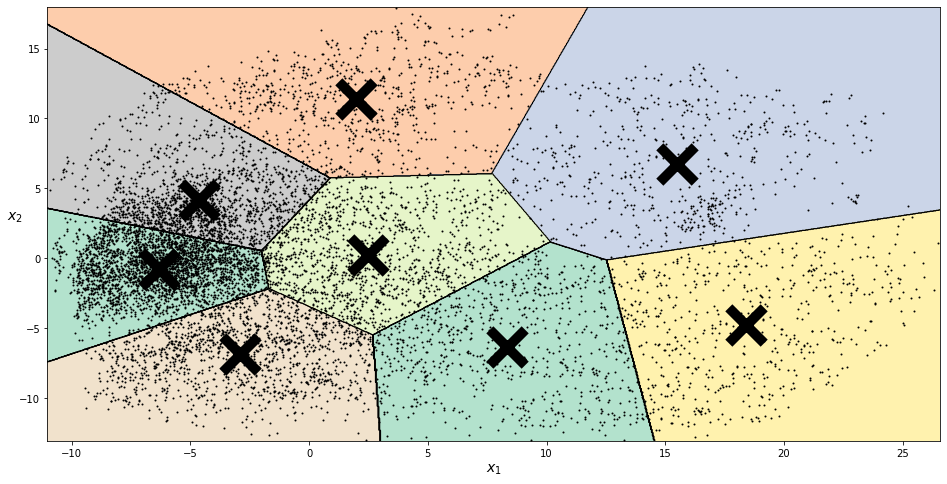

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


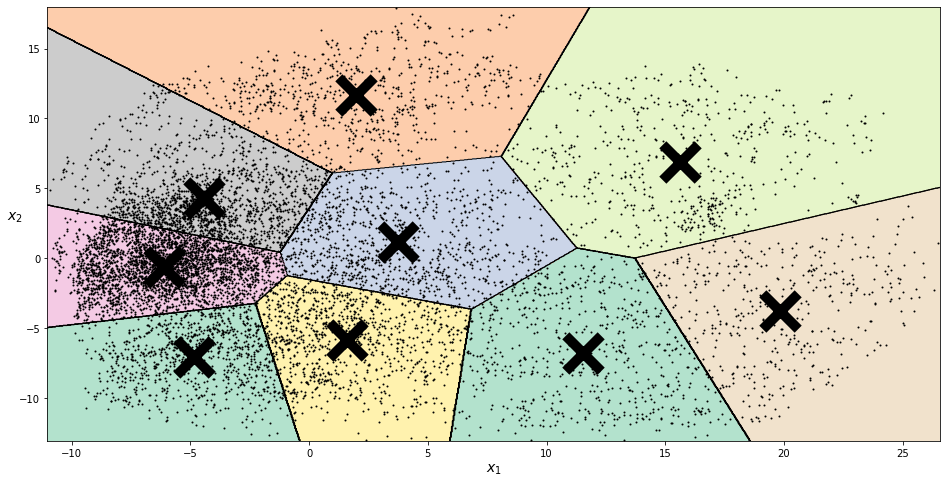

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


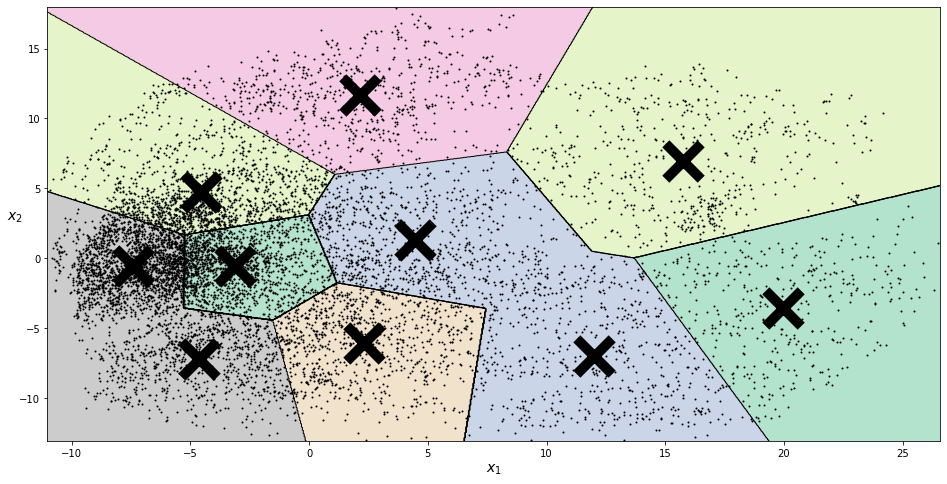

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarnin

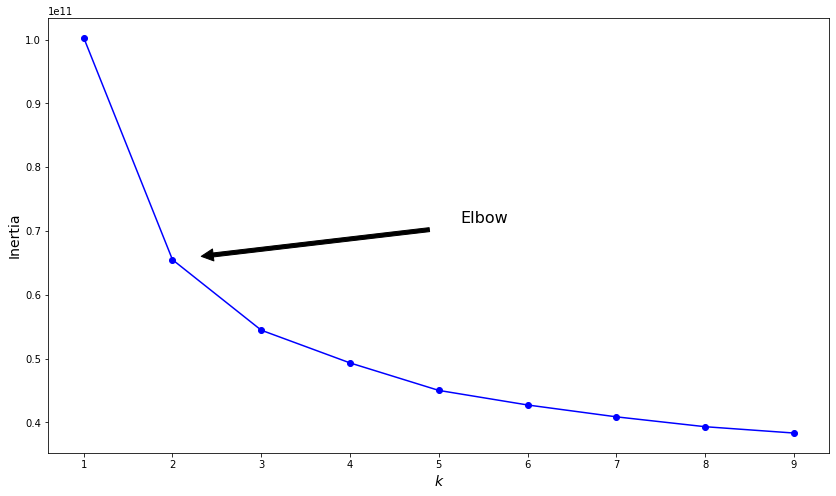

In [51]:
kmeans = KMeans(n_clusters=2, random_state=42, n_jobs = -1)
y_pred = kmeans.fit_predict(PCs_2d)

plt.figure(figsize=(16, 8))
plot_decision_boundaries(kmeans, PCs_2d)
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42, n_jobs = -1)
y_pred = kmeans.fit_predict(PCs_2d)

plt.figure(figsize=(16, 8))
plot_decision_boundaries(kmeans, PCs_2d)
plt.show()

kmeans = KMeans(n_clusters=4, random_state=42, n_jobs = -1)
y_pred = kmeans.fit_predict(PCs_2d)

plt.figure(figsize=(16, 8))
plot_decision_boundaries(kmeans, PCs_2d)
plt.show()

kmeans = KMeans(n_clusters=5, random_state=42, n_jobs = -1)
y_pred = kmeans.fit_predict(PCs_2d)

plt.figure(figsize=(16, 8))
plot_decision_boundaries(kmeans, PCs_2d)
plt.show()

kmeans = KMeans(n_clusters=6, random_state=42, n_jobs = -1)
y_pred = kmeans.fit_predict(PCs_2d)

plt.figure(figsize=(16, 8))
plot_decision_boundaries(kmeans, PCs_2d)
plt.show()

kmeans = KMeans(n_clusters=7, random_state=42, n_jobs = -1)
y_pred = kmeans.fit_predict(PCs_2d)

plt.figure(figsize=(16, 8))
plot_decision_boundaries(kmeans, PCs_2d)
plt.show()

kmeans = KMeans(n_clusters=8, random_state=42, n_jobs = -1)
y_pred = kmeans.fit_predict(PCs_2d)

plt.figure(figsize=(16, 8))
plot_decision_boundaries(kmeans, PCs_2d)
plt.show()

kmeans = KMeans(n_clusters=9, random_state=42, n_jobs = -1)
y_pred = kmeans.fit_predict(PCs_2d)

plt.figure(figsize=(16, 8))
plot_decision_boundaries(kmeans, PCs_2d)
plt.show()

kmeans = KMeans(n_clusters=10, random_state=42, n_jobs = -1)
y_pred = kmeans.fit_predict(PCs_2d)

plt.figure(figsize=(16, 8))
plot_decision_boundaries(kmeans, PCs_2d)
plt.show()

kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_jobs = -1).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(14, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


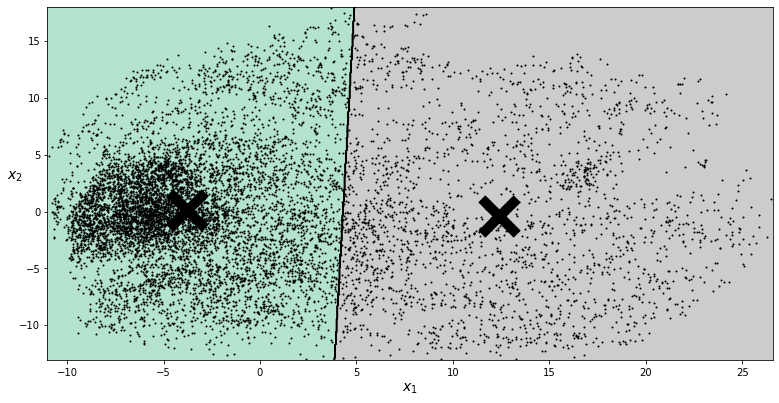

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


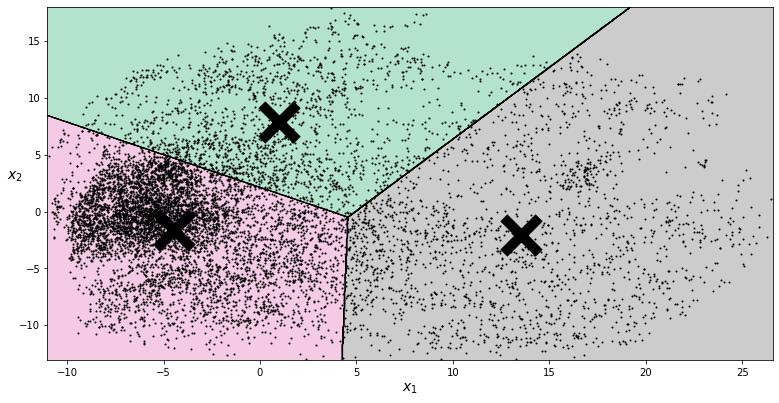

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


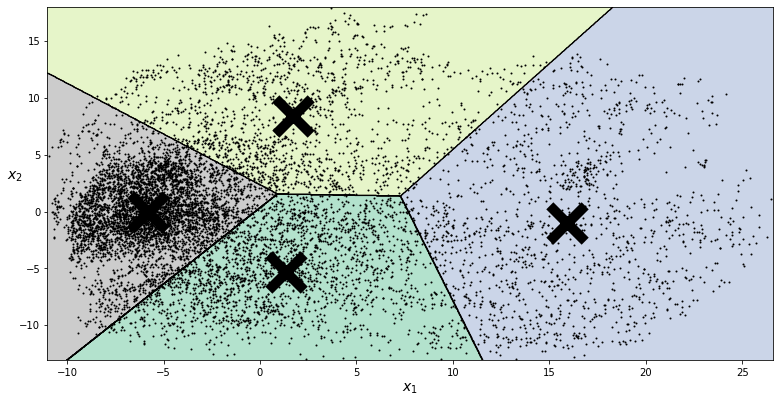

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


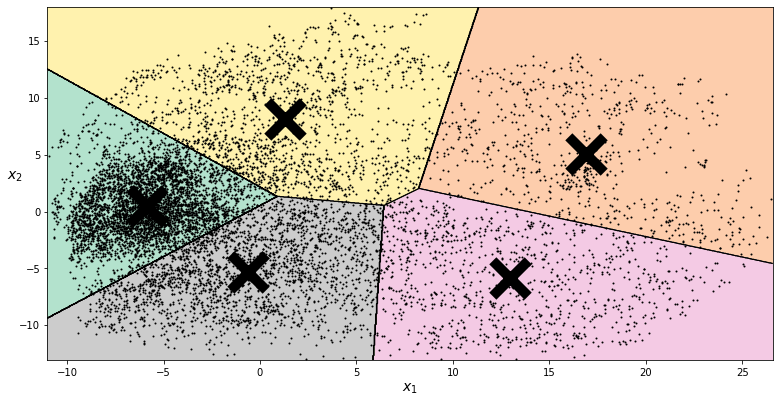

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


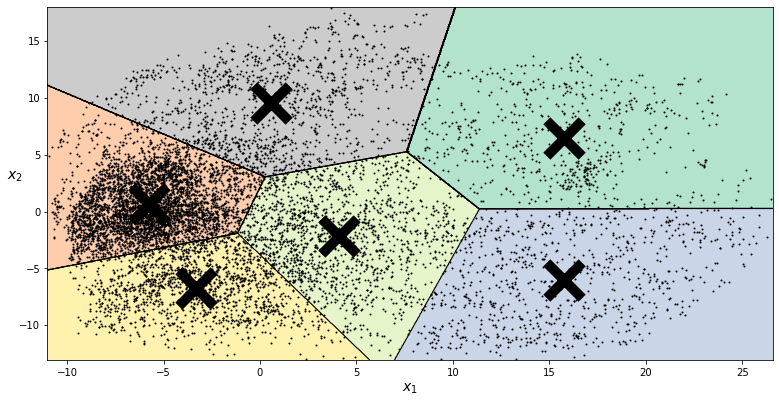

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


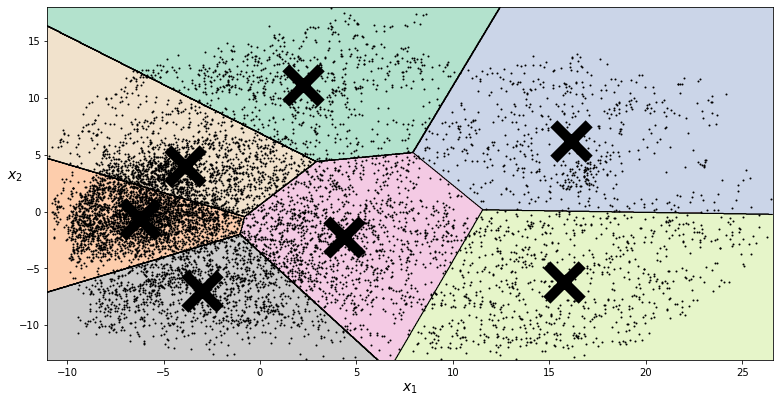

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


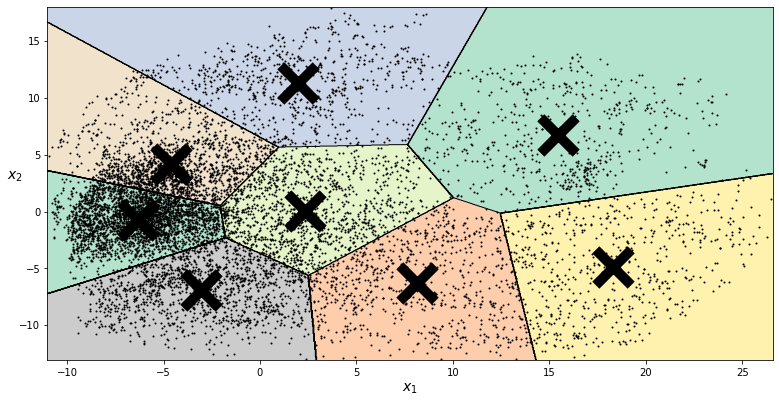

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


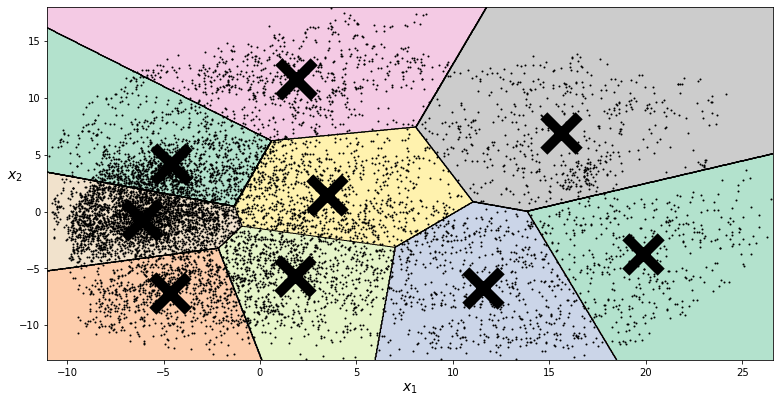

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


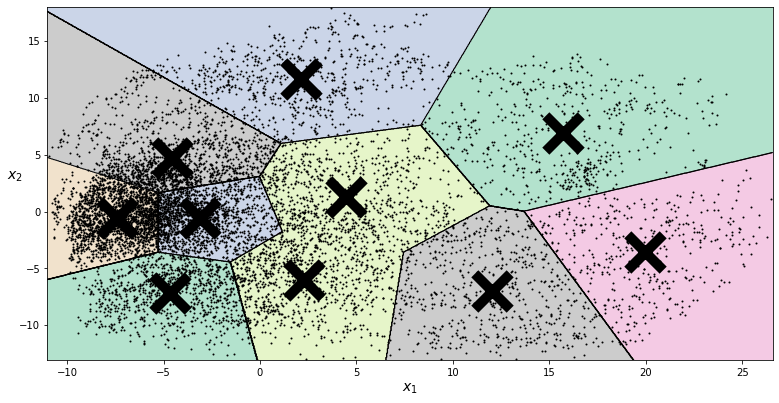

/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/swagmaster/anaconda3/envs/f21dlbn/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarnin

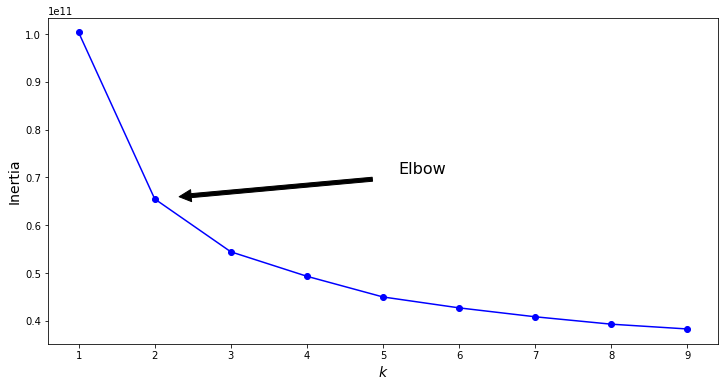

In [59]:
kmeans = KMeans(n_clusters=2, random_state=5, n_jobs = -1)
y_pred = kmeans.fit_predict(PCs_2d)

plt.figure(figsize=(13, 6.5))
plot_decision_boundaries(kmeans, PCs_2d)
plt.show()

kmeans = KMeans(n_clusters=3, random_state=5, n_jobs = -1)
y_pred = kmeans.fit_predict(PCs_2d)

plt.figure(figsize=(13, 6.5))
plot_decision_boundaries(kmeans, PCs_2d)
plt.show()

kmeans = KMeans(n_clusters=4, random_state=5, n_jobs = -1)
y_pred = kmeans.fit_predict(PCs_2d)

plt.figure(figsize=(13, 6.5))
plot_decision_boundaries(kmeans, PCs_2d)
plt.show()

kmeans = KMeans(n_clusters=5, random_state=5, n_jobs = -1)
y_pred = kmeans.fit_predict(PCs_2d)

plt.figure(figsize=(13, 6.5))
plot_decision_boundaries(kmeans, PCs_2d)
plt.show()

kmeans = KMeans(n_clusters=6, random_state=5, n_jobs = -1)
y_pred = kmeans.fit_predict(PCs_2d)

plt.figure(figsize=(13, 6.5))
plot_decision_boundaries(kmeans, PCs_2d)
plt.show()

kmeans = KMeans(n_clusters=7, random_state=5, n_jobs = -1)
y_pred = kmeans.fit_predict(PCs_2d)

plt.figure(figsize=(13, 6.5))
plot_decision_boundaries(kmeans, PCs_2d)
plt.show()

kmeans = KMeans(n_clusters=8, random_state=5, n_jobs = -1)
y_pred = kmeans.fit_predict(PCs_2d)

plt.figure(figsize=(13, 6.5))
plot_decision_boundaries(kmeans, PCs_2d)
plt.show()

kmeans = KMeans(n_clusters=9, random_state=5, n_jobs = -1)
y_pred = kmeans.fit_predict(PCs_2d)

plt.figure(figsize=(13, 6.5))
plot_decision_boundaries(kmeans, PCs_2d)
plt.show()

kmeans = KMeans(n_clusters=10, random_state=5, n_jobs = -1)
y_pred = kmeans.fit_predict(PCs_2d)

plt.figure(figsize=(13, 6.5))
plot_decision_boundaries(kmeans, PCs_2d)
plt.show()

kmeans_per_k = [KMeans(n_clusters=k, random_state=5, n_jobs = -1).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

In [55]:
import arff

In [56]:
PCs_2d

PC1_2d    PC2_2d
0    -1.202130 -1.409708
1    -1.067926 -1.191736
2    -1.086095 -0.813921
3    -1.161017 -0.775202
4     0.321045 -0.141375
...        ...       ...
9685  5.891564 -5.178150
9686  6.270769 -5.132873
9687  6.763497 -5.736202
9688  7.849516 -5.406915
9689  5.106886 -5.799899

[9690 rows x 2 columns]

In [57]:
arff.dump('PCs_2d.arff'
      , PCs_2d.values
      , relation='PCS_2d'
      , names=PCs_2d.columns)